In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report


In [42]:
# Step 1: Load Dataset
data = pd.read_csv('/kaggle/input/tekupprojet/taxi_trip_pricing.csv')

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values by dropping rows with NaN values
data = data.dropna()
print(f"Data shape after dropping missing values: {data.shape}")

# Define features (X) and target (y)
X = data.drop(columns='Trip_Price')
y = data['Trip_Price']


Dataset Preview:
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


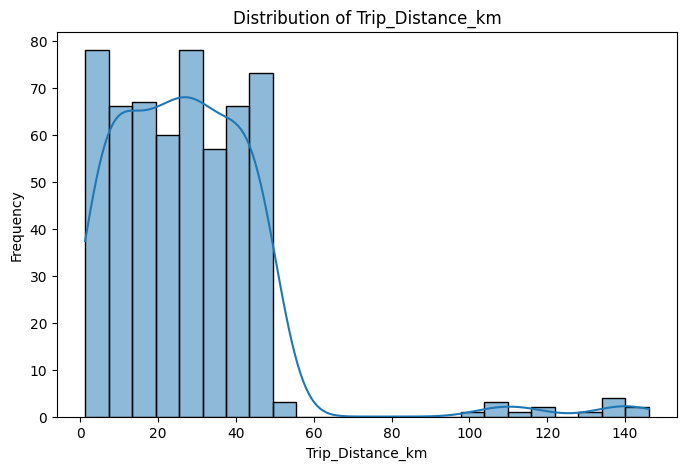

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


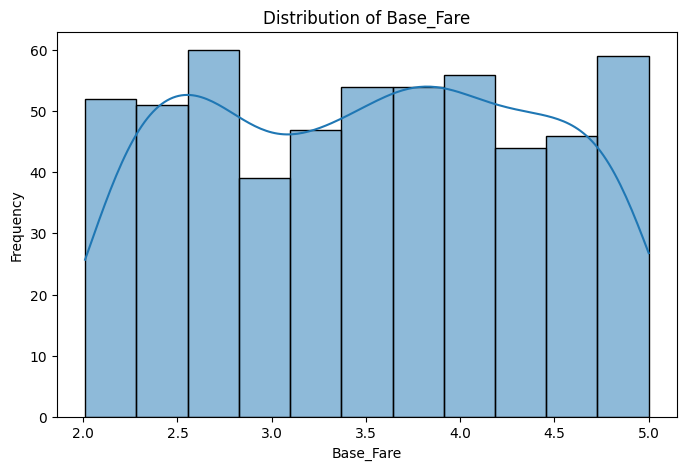

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


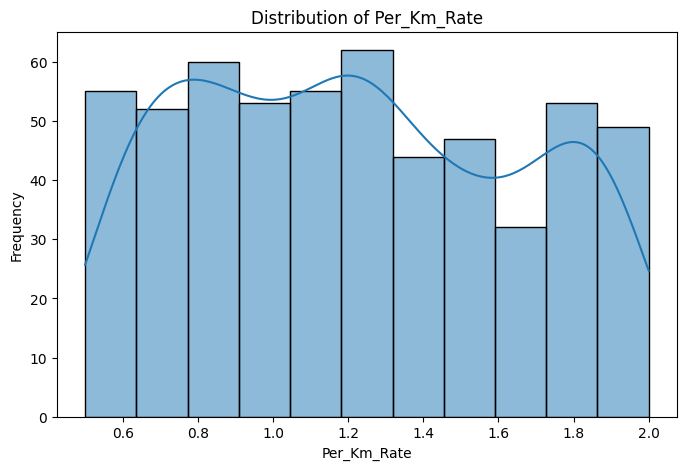

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


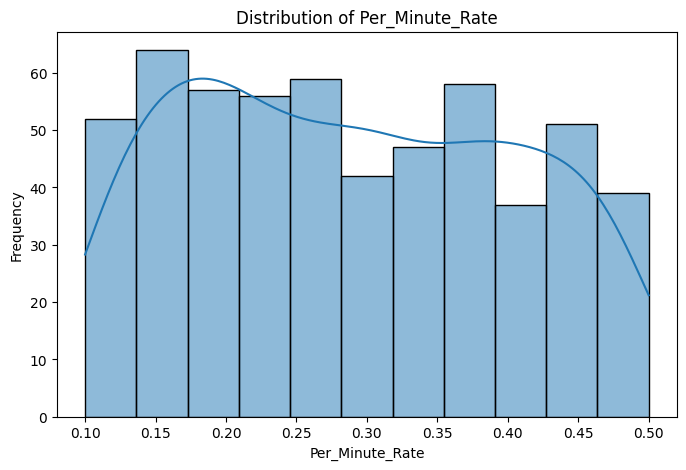

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


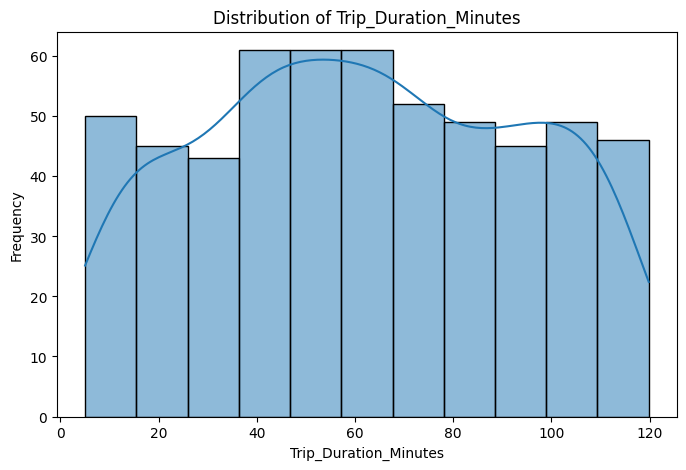

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


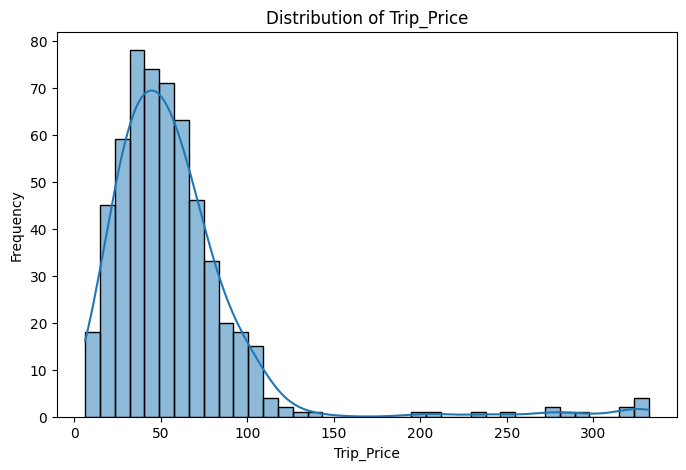

In [43]:
# Step 2: Data Visualization
# Visualize numeric feature distributions
numeric_features = ['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

for column in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [44]:
# Step 3: Discretize the target variable 'Trip_Price'
bins = 5  # Number of bins
labels = [f'bin_{i}' for i in range(bins)]
y_binned = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform').fit_transform(y.values.reshape(-1, 1)).astype(int).reshape(-1)

# Update target variable to binned categories
y = y_binned


In [45]:
# Step 4: Data Preprocessing
# Define categorical and numeric features
categorical_features = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather', 'Passenger_Count']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features[:-1]),  # Exclude 'Trip_Price'
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [46]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Training K-Nearest Neighbors...

K-Nearest Neighbors Evaluation Metrics:
Accuracy: 0.8698224852071006
F1-Score: 0.8562592732676205
Recall: 0.8698224852071006

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       133
           1       0.75      0.48      0.59        31
           3       0.00      0.00      0.00         1
           4       0.80      1.00      0.89         4

    accuracy                           0.87       169
   macro avg       0.61      0.61      0.60       169
weighted avg       0.86      0.87      0.86       169

Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


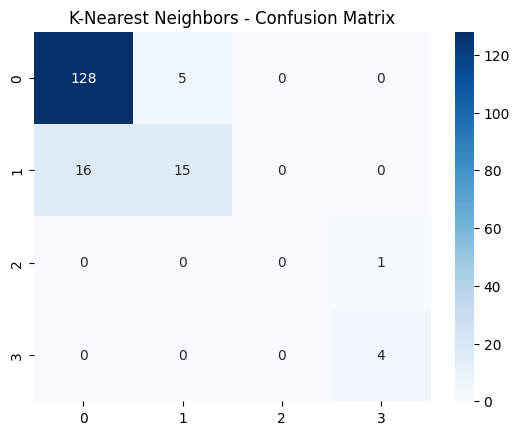


Training Decision Tree...

Decision Tree Evaluation Metrics:
Accuracy: 0.8757396449704142
F1-Score: 0.8734265734265734
Recall: 0.8757396449704142

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.72      0.68      0.70        31
           3       0.00      0.00      0.00         1
           4       0.57      1.00      0.73         4

    accuracy                           0.88       169
   macro avg       0.56      0.65      0.59       169
weighted avg       0.87      0.88      0.87       169

Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


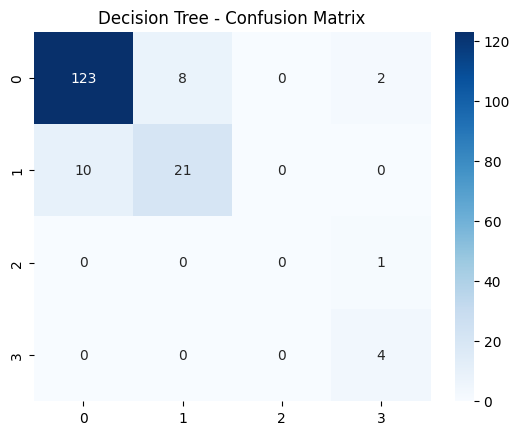

In [47]:
# Step 6: Modeling and Evaluation
# Define models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    print(f"\n{name} Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [48]:
# Step 7: Feature Importance for Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('model', decision_tree)])
pipeline_dt.fit(X_train, y_train)

# Get transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Check if the model has feature_importances_
if hasattr(decision_tree, 'feature_importances_'):
    feature_importances = decision_tree.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importances (Decision Tree):")
    print(importance_df)



Feature Importances (Decision Tree):
                           Feature  Importance
0            num__Trip_Distance_km    0.437082
2                 num__Per_Km_Rate    0.292804
4       num__Trip_Duration_Minutes    0.129039
3             num__Per_Minute_Rate    0.100057
6         cat__Time_of_Day_Evening    0.012787
16               cat__Weather_Snow    0.011017
1                   num__Base_Fare    0.010328
19        cat__Passenger_Count_3.0    0.006885
13  cat__Traffic_Conditions_Medium    0.000000
18        cat__Passenger_Count_2.0    0.000000
17        cat__Passenger_Count_1.0    0.000000
15               cat__Weather_Rain    0.000000
14              cat__Weather_Clear    0.000000
10        cat__Day_of_Week_Weekend    0.000000
12     cat__Traffic_Conditions_Low    0.000000
11    cat__Traffic_Conditions_High    0.000000
9         cat__Day_of_Week_Weekday    0.000000
8           cat__Time_of_Day_Night    0.000000
7         cat__Time_of_Day_Morning    0.000000
5       cat__Time_of_D

In [51]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load pre-trained model
model = joblib.load('path_to_your_model.pkl')

# Define the UI components for the Streamlit app
def predict_trip_price(features):
    # Example input features, replace with actual ones from your dataset
    # features = { 'Trip_Distance_km': 10.5, 'Base_Fare': 5.0, 'Per_Km_Rate': 2.0, ... }

    prediction = model.predict([features])
    return prediction

# Streamlit UI layout
st.title('Taxi Trip Pricing Prediction')

# Input features for the prediction
trip_distance = st.number_input('Trip Distance (km)', value=5.0)
base_fare = st.number_input('Base Fare', value=3.0)
per_km_rate = st.number_input('Per Km Rate', value=1.5)
per_minute_rate = st.number_input('Per Minute Rate', value=0.5)
trip_duration = st.number_input('Trip Duration (Minutes)', value=10)
time_of_day = st.selectbox('Time of Day', ['Morning', 'Afternoon', 'Evening', 'Night'])
day_of_week = st.selectbox('Day of Week', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
traffic_conditions = st.selectbox('Traffic Conditions', ['Low', 'Medium', 'High'])
weather = st.selectbox('Weather', ['Clear', 'Rainy', 'Cloudy', 'Snowy'])
passenger_count = st.number_input('Passenger Count', value=1)

# Predict button
if st.button('Predict Trip Price'):
    features = {
        'Trip_Distance_km': trip_distance,
        'Base_Fare': base_fare,
        'Per_Km_Rate': per_km_rate,
        'Per_Minute_Rate': per_minute_rate,
        'Trip_Duration_Minutes': trip_duration,
        'Time_of_Day': time_of_day,
        'Day_of_Week': day_of_week,
        'Traffic_Conditions': traffic_conditions,
        'Weather': weather,
        'Passenger_Count': passenger_count
    }

    prediction = predict_trip_price(features)
    st.write(f"Predicted Trip Price: ${prediction[0]:.2f}")



ModuleNotFoundError: No module named 'streamlit'

In [ ]:
pip install streamlit
